In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv")

In [7]:
x.head()

,0.07184119218267622,0.8553524138064769,-0.3055966142959303,0.028252569993086545,1.8268953710701943
0,0.139521,-0.423507,0.461059,-0.447400,-0.034988
1,1.626311,-0.257622,-0.697520,1.413219,1.086292
2,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
3,-0.783365,-0.861232,0.951448,-0.117306,0.680597
4,3.077357,0.948615,-0.295527,1.390358,-0.116174


In [8]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None)

In [9]:
# x.head()
x.shape, y.shape

((387, 5), (387, 1))

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
binary = LinearRegression()

In [12]:
binary.fit(x[[1]], y)

LinearRegression()

In [13]:
binary.coef_

array([[95.52010745]])

In [14]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

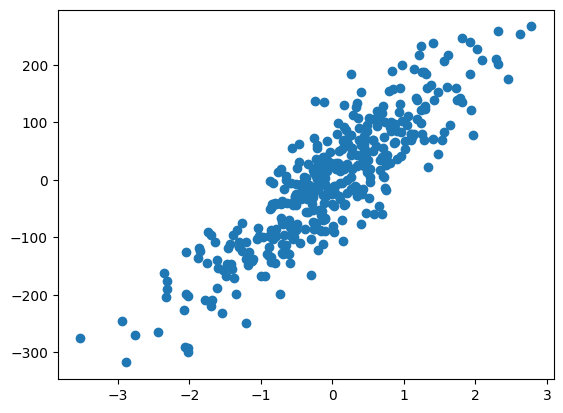

In [17]:
plt.scatter(x[1], y)

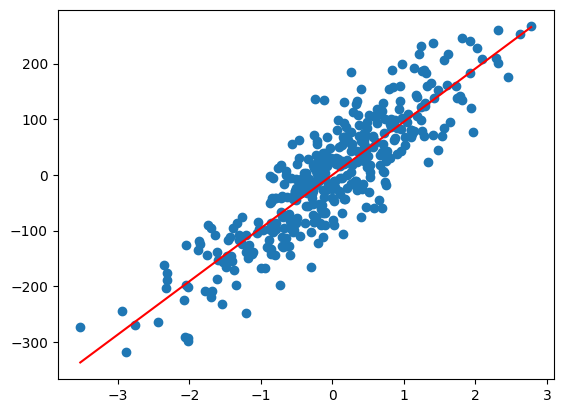

In [ ]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [20]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

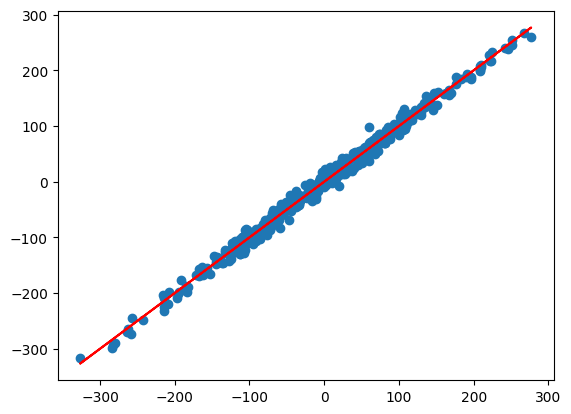

In [21]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

# Task 1 / Task 2
### x.shape[1] used for multiple number of columns

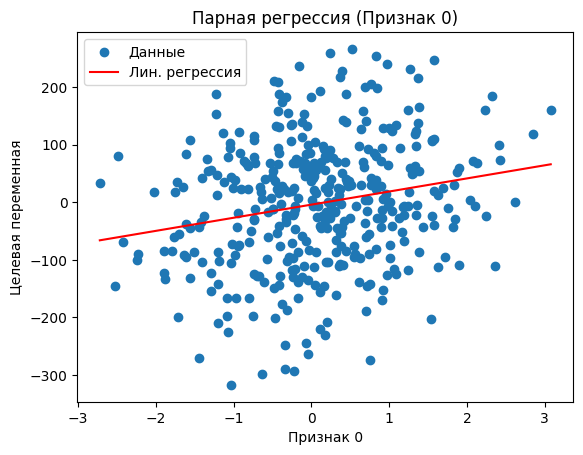

Коэффициенты регрессии для признака 0: 22.7811134205866, Смещение: -4.05666473187296


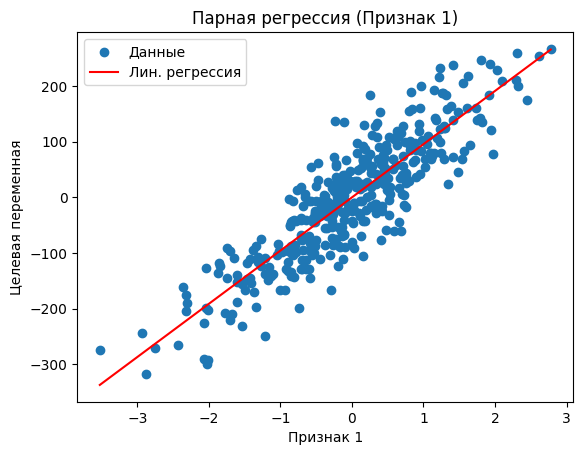

Коэффициенты регрессии для признака 1: 95.52010744785575, Смещение: 0.003320924502834277


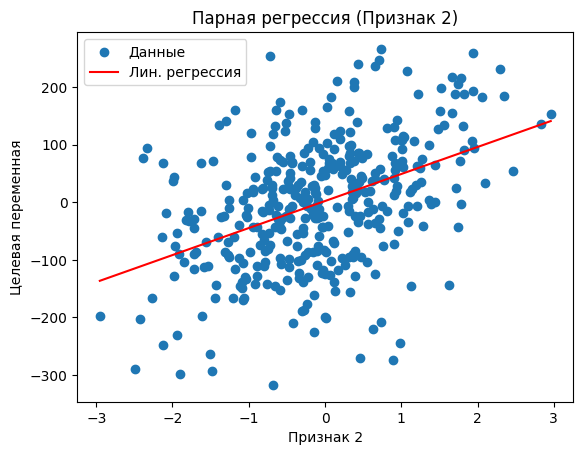

Коэффициенты регрессии для признака 2: 46.94897635119021, Смещение: 2.1934010808461943


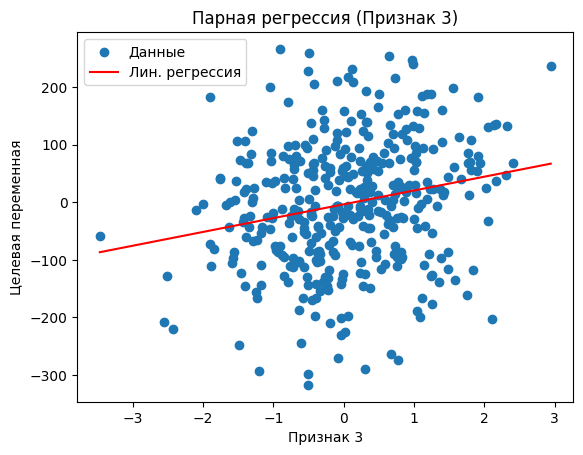

Коэффициенты регрессии для признака 3: 23.998824072824334, Смещение: -3.488249616549184


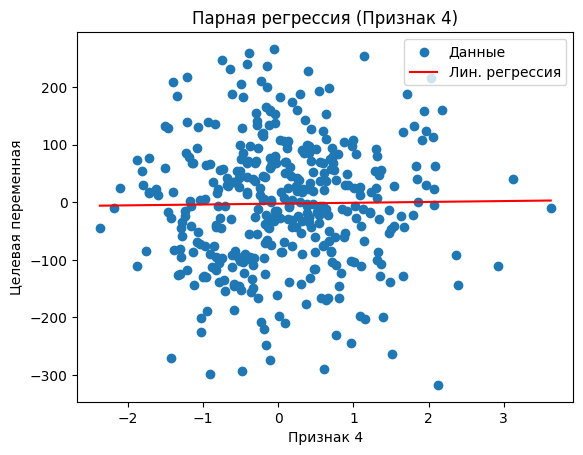

Коэффициенты регрессии для признака 4: 1.4908204197891677, Смещение: -2.329709071771846


In [34]:
num_features = x.shape[1]

for i in range(num_features):
    model = LinearRegression()
    model.fit(x[[i]], y)
    
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape(-1, 1)
    yy_pred = model.predict(xx)

    plt.scatter(x[i], y, label="Данные")
    plt.plot(xx, yy_pred, color='red', label="Лин. регрессия")
    plt.xlabel(f"Признак {i}")
    plt.ylabel("Целевая переменная")
    plt.legend()
    plt.title(f"Парная регрессия (Признак {i})")
    plt.show()

    print(f"Коэффициенты регрессии для признака {i}: {model.coef_[0][0]}, Смещение: {model.intercept_[0]}")

# Task 3

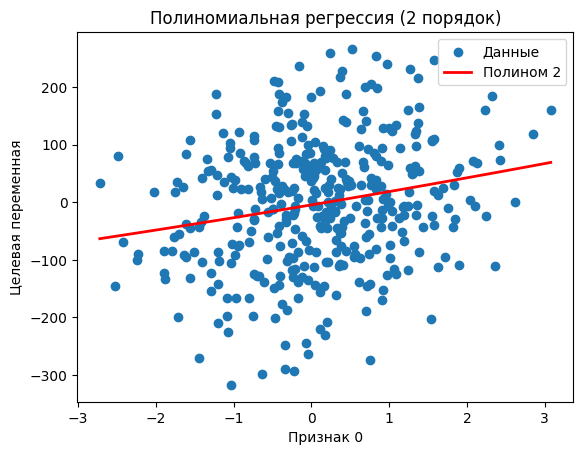

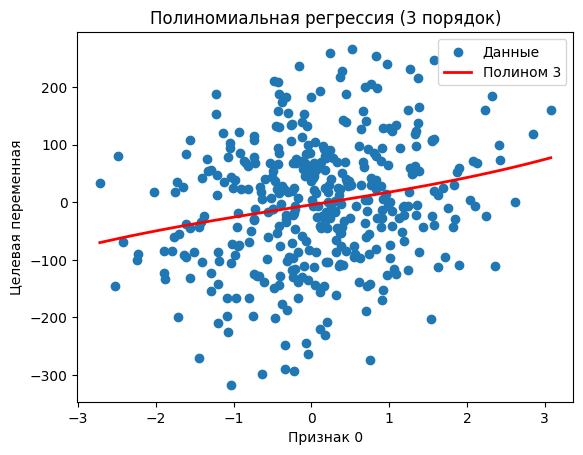

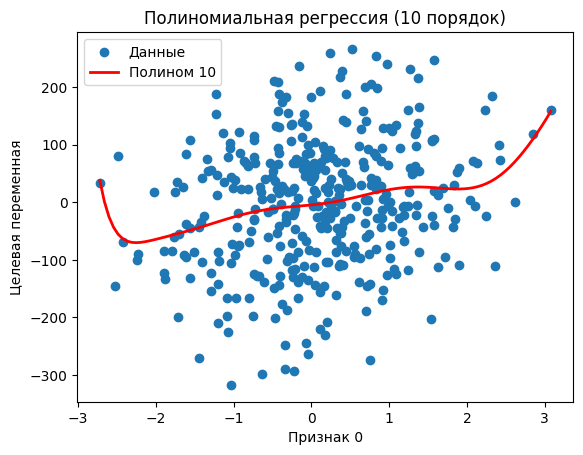

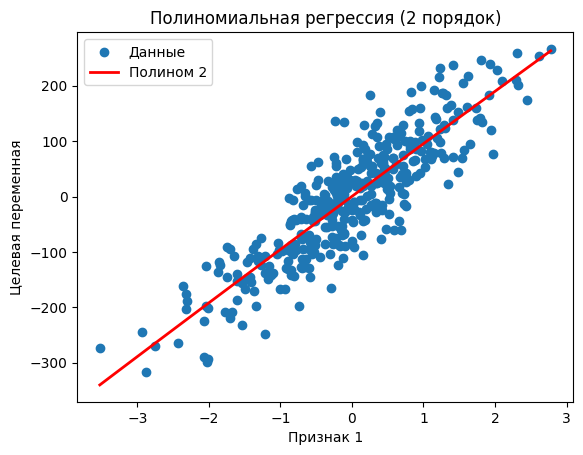

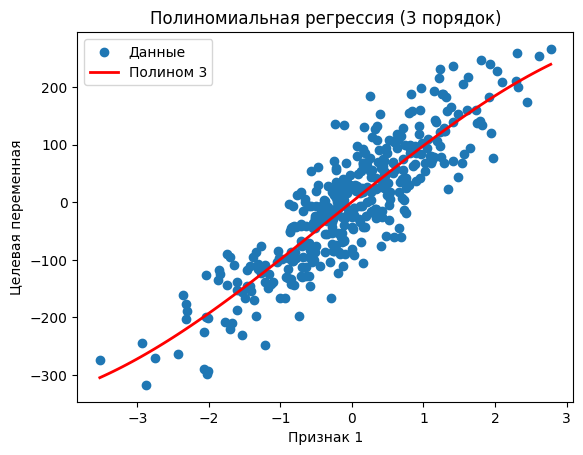

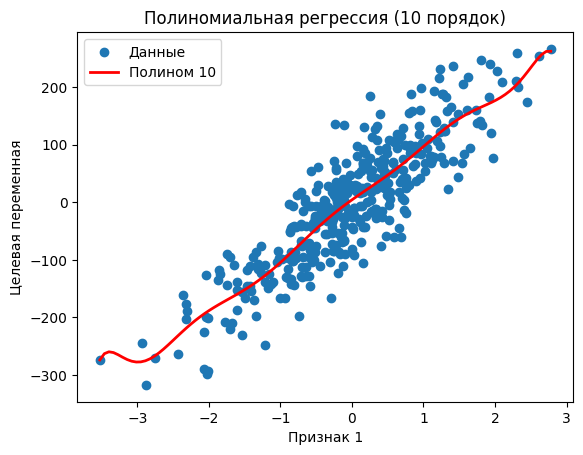

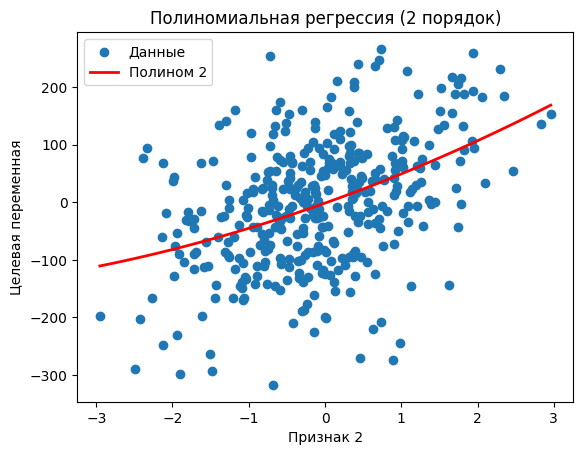

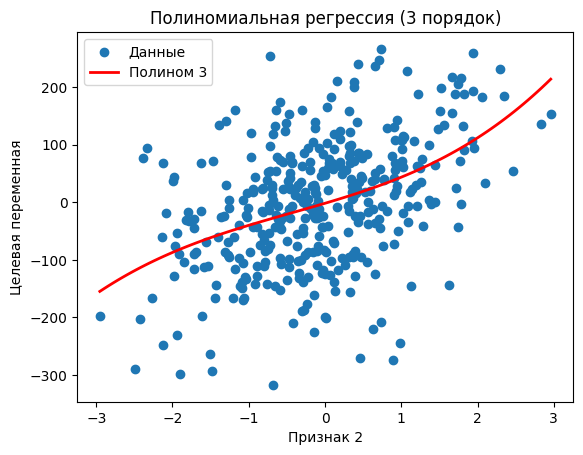

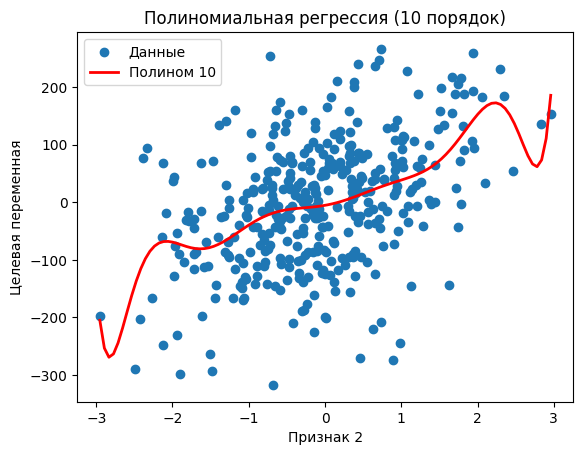

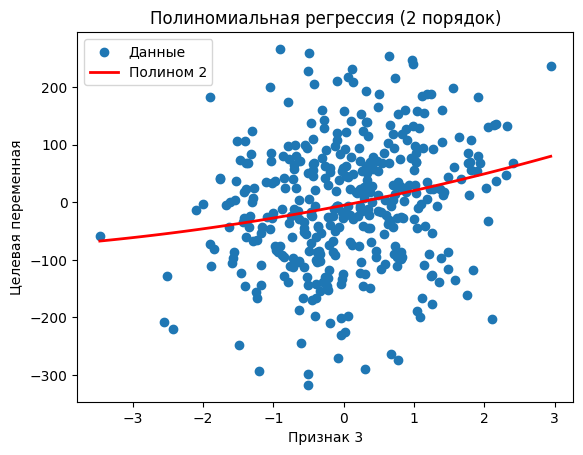

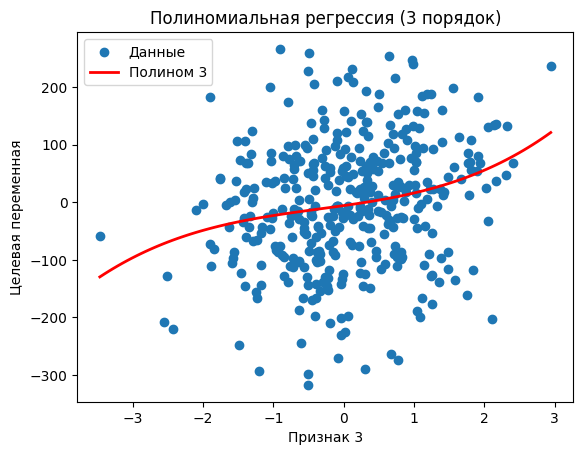

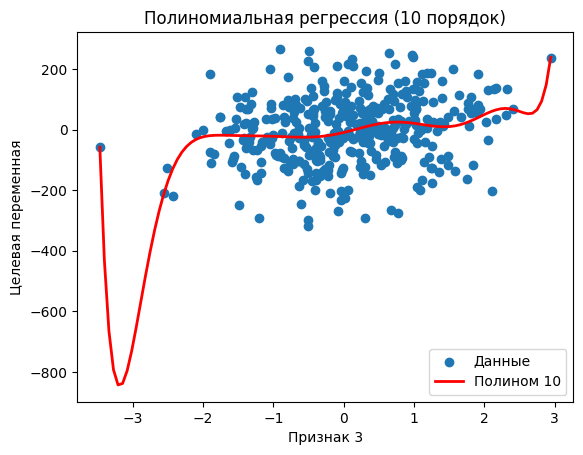

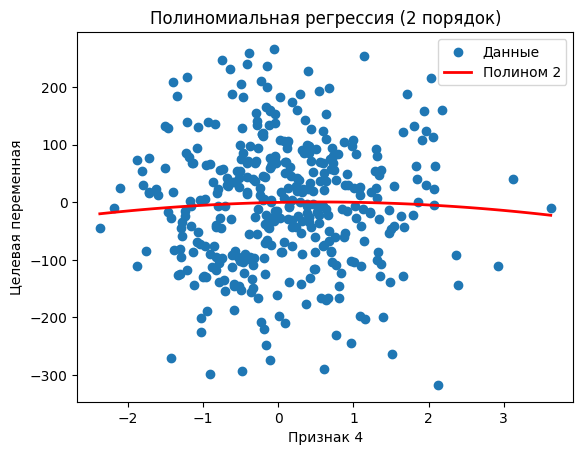

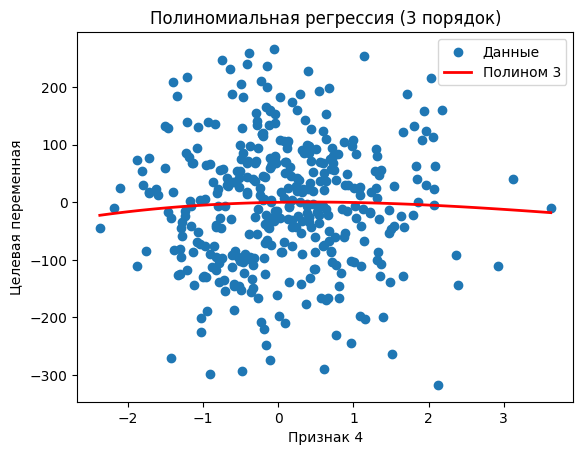

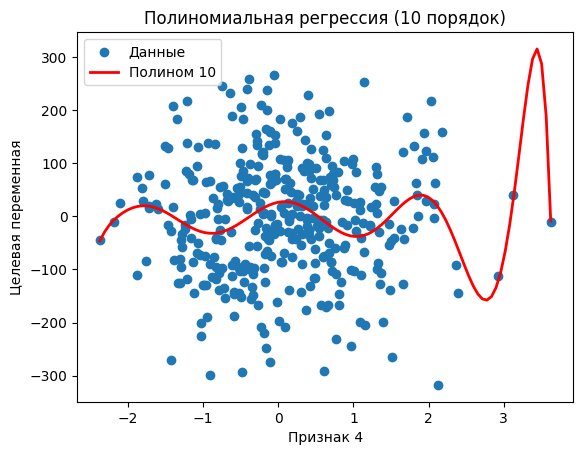

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degrees = [2, 3, 10]

num_features = x.shape[1]

for i in range(num_features):
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        model = make_pipeline(poly, LinearRegression())
        model.fit(x[[i]], y)

        xx = np.linspace(x[i].min(), x[i].max(), 100).reshape(-1, 1)
        yy_pred = model.predict(xx)

        plt.scatter(x[i], y, label="Данные")
        plt.plot(xx, yy_pred, color='red', label=f"Полином {degree}", linewidth=2)
        plt.xlabel(f"Признак {i}")
        plt.ylabel("Целевая переменная")
        plt.legend()
        plt.title(f"Полиномиальная регрессия ({degree} порядок)")
        plt.show()

# Task 4

In [39]:
results = []

lin_model = LinearRegression()
lin_model.fit(x, y)
r2_linear = lin_model.score(x, y)
results.append(["Линейная регрессия", r2_linear])

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    model = make_pipeline(poly, LinearRegression())
    model.fit(x, y)
    r2_poly = model.score(x, y)
    results.append([f"Полиномиальная ({degree})", r2_poly])

df_results = pd.DataFrame(results, columns=["Модель", "R²"])
print(df_results)

                Модель        R²
0   Линейная регрессия  0.992220
1   Полиномиальная (2)  0.992600
2   Полиномиальная (3)  0.993192
3  Полиномиальная (10)  1.000000


### 1) Если R² ≈ 1, модель хорошо описывает данные

### 2) Если R² слишком высоко на обучении, но падает на тестовых данных → переобучение

# Task 5

In [40]:
# MAE (средняя абсолютная ошибка)
# MSE (среднеквадратичная ошибка)
# RMSE (корень из MSE)

from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(model, x, y):
    y_pred = model.predict(x)
    r2 = model.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

metrics = []
for degree in [1, 2, 3, 10]:
    poly = PolynomialFeatures(degree=degree)
    model = make_pipeline(poly, LinearRegression())
    model.fit(x, y)
    r2, mae, mse, rmse = evaluate_model(model, x, y)
    metrics.append([f"Полиномиальная ({degree})", r2, mae, mse, rmse])

df_metrics = pd.DataFrame(metrics, columns=["Модель", "R²", "MAE", "MSE", "RMSE"])
print(df_metrics)

                Модель        R²           MAE           MSE          RMSE
0   Полиномиальная (1)  0.992220  7.780684e+00  9.349229e+01  9.669141e+00
1   Полиномиальная (2)  0.992600  7.553355e+00  8.891857e+01  9.429664e+00
2   Полиномиальная (3)  0.993192  7.095853e+00  8.180684e+01  9.044713e+00
3  Полиномиальная (10)  1.000000  1.232755e-10  1.002461e-19  3.166166e-10


# Task 6

In [41]:
import time

times = []
for degree in degrees:
    start = time.time()
    poly = PolynomialFeatures(degree=degree)
    model = make_pipeline(poly, LinearRegression())
    model.fit(x, y)
    end = time.time()
    times.append([f"Полином {degree}", end - start])

df_times = pd.DataFrame(times, columns=["Модель", "Время (сек)"])
print(df_times)

       Модель  Время (сек)
0   Полином 2     0.007380
1   Полином 3     0.009845
2  Полином 10     0.246823
